# 随机森林
**随机森林能够实现以下功能：**
+ 分类
+ 回归
+ 降维


In [1]:
import os
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier

In [2]:
os.chdir(r'D:\pycharm-python\datasets')
df = pd.read_csv(r'petrol_consumption.csv')

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48 entries, 0 to 47
Data columns (total 5 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   Petrol_tax                    48 non-null     float64
 1   Average_income                48 non-null     int64  
 2   Paved_Highways                48 non-null     int64  
 3   Population_Driver_licence(%)  48 non-null     float64
 4   Petrol_Consumption            48 non-null     int64  
dtypes: float64(2), int64(3)
memory usage: 2.0 KB


In [4]:
df.head()

,Petrol_tax,Average_income,Paved_Highways,Population_Driver_licence(%),Petrol_Consumption
0,9.0,3571,1976,0.525,541
1,9.0,4092,1250,0.572,524
2,9.0,3865,1586,0.580,561
3,7.5,4870,2351,0.529,414
4,8.0,4399,431,0.544,410


In [5]:
feature_name = [i for i in df.columns][:4]

In [6]:
x = df.iloc[:, 0:4].values
y = df.iloc[:, 4].values

In [8]:
x

array([[9.0000e+00, 3.5710e+03, 1.9760e+03, 5.2500e-01],
       [9.0000e+00, 4.0920e+03, 1.2500e+03, 5.7200e-01],
       [9.0000e+00, 3.8650e+03, 1.5860e+03, 5.8000e-01],
       [7.5000e+00, 4.8700e+03, 2.3510e+03, 5.2900e-01],
       [8.0000e+00, 4.3990e+03, 4.3100e+02, 5.4400e-01],
       [1.0000e+01, 5.3420e+03, 1.3330e+03, 5.7100e-01],
       [8.0000e+00, 5.3190e+03, 1.1868e+04, 4.5100e-01],
       [8.0000e+00, 5.1260e+03, 2.1380e+03, 5.5300e-01],
       [8.0000e+00, 4.4470e+03, 8.5770e+03, 5.2900e-01],
       [7.0000e+00, 4.5120e+03, 8.5070e+03, 5.5200e-01],
       [8.0000e+00, 4.3910e+03, 5.9390e+03, 5.3000e-01],
       [7.5000e+00, 5.1260e+03, 1.4186e+04, 5.2500e-01],
       [7.0000e+00, 4.8170e+03, 6.9300e+03, 5.7400e-01],
       [7.0000e+00, 4.2070e+03, 6.5800e+03, 5.4500e-01],
       [7.0000e+00, 4.3320e+03, 8.1590e+03, 6.0800e-01],
       [7.0000e+00, 4.3180e+03, 1.0340e+04, 5.8600e-01],
       [7.0000e+00, 4.2060e+03, 8.5080e+03, 5.7200e-01],
       [7.0000e+00, 3.7180e+03,

In [9]:
y

array([541, 524, 561, 414, 410, 457, 344, 467, 464, 498, 580, 471, 525,
       508, 566, 635, 603, 714, 865, 640, 649, 540, 464, 547, 460, 566,
       577, 631, 574, 534, 571, 554, 577, 628, 487, 644, 640, 704, 648,
       968, 587, 699, 632, 591, 782, 510, 610, 524], dtype=int64)

In [11]:
x_train, x_test, y_train, y_test = train_test_split(x, y, train_size=0.8, random_state=0)

In [14]:
y_train

array([471, 554, 628, 631, 524, 561, 610, 865, 635, 574, 464, 603, 699,
       649, 632, 464, 508, 566, 457, 714, 644, 566, 648, 524, 525, 591,
       460, 344, 547, 640, 540, 640, 498, 968, 510, 414, 541, 782],
      dtype=int64)

In [13]:
regressor = RandomForestClassifier(
    n_estimators=200,
    random_state=0
)
regressor.fit(x_train, y_train)

RandomForestClassifier(n_estimators=200, random_state=0)

In [18]:
ret = regressor.predict(x_test)

In [8]:
from sklearn import metrics

In [9]:
metrics.mean_absolute_error(ret, y_test)

65.0

In [10]:
metrics.mean_squared_error(ret, y_test)

6645.4

In [11]:
np.sqrt(metrics.mean_squared_error(ret, y_test))  # 平方差

81.51932286274217

In [12]:
ret

array([547, 540, 628, 554, 628, 566, 591, 610, 460, 464], dtype=int64)

### 评估特征的重要性

In [0]:
importances = list(regressor.feature_importances_)
forest_importance = pd.Series(importances, index=feature_name)

In [21]:
importances

[0.14462102432561685,
 0.2898823015411798,
 0.2802663225148426,
 0.2852303516183609]

In [22]:
forest_importance

Petrol_tax                      0.144621
Average_income                  0.289882
Paved_Highways                  0.280266
Population_Driver_licence(%)    0.285230
dtype: float64

In [14]:
from sklearn.datasets import load_wine

In [15]:
x = load_wine().data
y = load_wine().target
feature_names = load_wine().feature_names

In [16]:
regressor = RandomForestClassifier(
    n_estimators=200
)

In [17]:
regressor.fit(x, y)
importances = regressor.feature_importances_
importances

array([0.1138574 , 0.02662297, 0.01620376, 0.03105475, 0.03049827,
       0.0546353 , 0.15463567, 0.01319121, 0.02318393, 0.15159013,
       0.1017055 , 0.11799859, 0.1648225 ])

In [18]:
importances[1]

0.026622971266455537

In [19]:
x_train, x_test, y_train, y_test = train_test_split(x, y, train_size=0.8)

In [20]:
a = zip(importances.tolist(), feature_names)
importances = []
feature_names = []
for i in sorted(a, key=lambda x: x[0]):
    importances.append(i[0])
    feature_names.append(i[1])

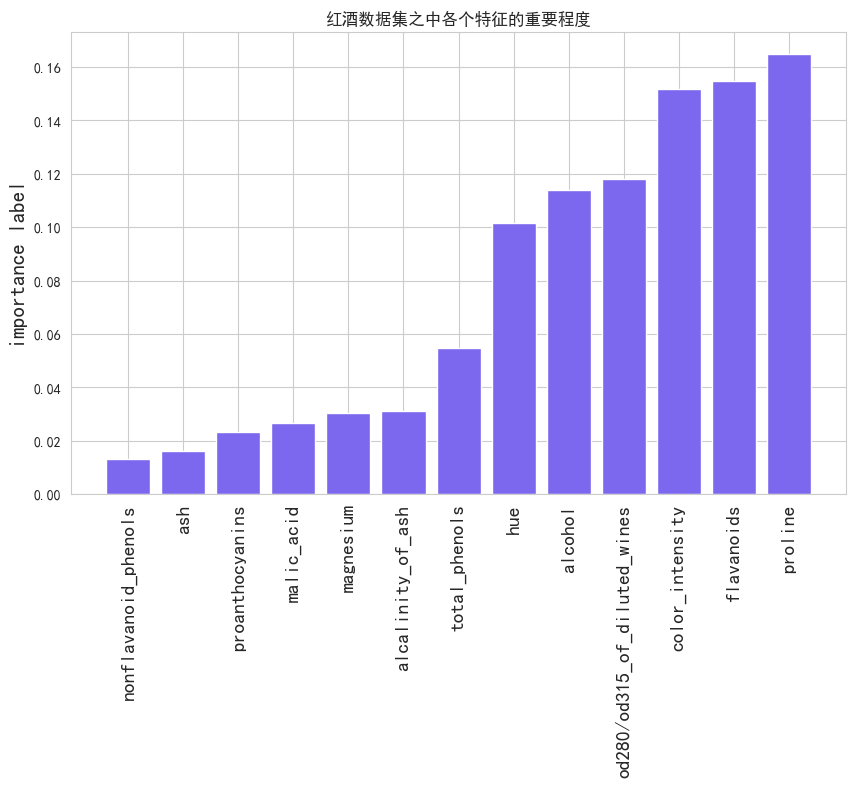

In [21]:
plt.figure(figsize=(10, 6))
plt.title('红酒数据集之中各个特征的重要程度')
plt.ylabel('importance label', fontsize=15, rotation=90)
plt.rcParams['font.sans-serif'] = ['SimHei']
plt.rcParams['axes.unicode_minus'] = False
plt.bar(range(1, 14), importances, color='#7B68EE')
plt.xticks(range(1, 14), feature_names, rotation=90, fontsize=14)
plt.show()

### 使用SVR进行回归分析

In [22]:
from sklearn.svm import SVR
from sklearn import preprocessing
# from sklearn.externals import joblib

In [24]:
top3_features = feature_names[-3:]
top3_features

['color_intensity', 'flavanoids', 'proline']